# Deep Learning - Derin Ogrenme - Artificial Neural Networks - Yapay Sinir Ağları

In [2]:
#epip install tensorflow

In [3]:
#Deep Neural Network Classification

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
import tensorflow as tf   #çok boyutlu matrixler

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
x=df.drop('Outcome', axis=1)

In [11]:
y=df[['Outcome']]

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.shape #derin öğrenme için en az 1000 olması gerek

(768, 9)

In [14]:
x=df.iloc[:,0:8]

In [15]:
y=df.iloc[:,8]

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [18]:
model=Sequential()
model.add(Dense(120,activation='relu'))   #8 sütun var diye 8 yazdık 1000 de yazardık istersek 120 yazdık sonra neuron sayısını arttırdık giderek azalan nöron ekledik başarı oran ıarttı 120 yapınca
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))   #son layer'da output için Sigmoid kullanıyoruz aynı zamanda classification olduğu için 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) 


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x,y,epochs=250,batch_size=32, validation_split=.2, verbose=1)   #768/32 tek seferde işlemek yerine 32'ye bölüp 24 satır işleyip diğer 24'ü işliyor

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5583 - loss: 1.1195 - val_accuracy: 0.5519 - val_loss: 0.7410
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6687 - loss: 0.6554 - val_accuracy: 0.6364 - val_loss: 0.6597
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6911 - loss: 0.6126 - val_accuracy: 0.6104 - val_loss: 0.6738
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6821 - loss: 0.6020 - val_accuracy: 0.6558 - val_loss: 0.6296
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6921 - loss: 0.6438 - val_accuracy: 0.6558 - val_loss: 0.6318
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7077 - loss: 0.5769 - val_accuracy: 0.6753 - val_loss: 0.6093
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7036 - loss: 0.5689 - val_accuracy: 0.6364 - val_loss: 0.6569
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7064 - loss: 0.6344 - val_accuracy: 0.6753

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,607 (217.22 KB)

 Trainable params: 18,535 (72.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,072 (144.82 KB)

In [22]:
from sklearn.preprocessing import normalize, scale

In [23]:
x=scale(x)  #y yi yapmıyoruz çünkü onun aslına karışmıyoruz

In [24]:
history=model.fit(x,y,epochs=250,batch_size=32, validation_split=.2, verbose=1) #model neler yaşadı grafikle göstermek için history diye değişkene atadık

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6598 - loss: 1.8486 - val_accuracy: 0.6494 - val_loss: 0.7382
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6657 - loss: 0.6759 - val_accuracy: 0.6558 - val_loss: 0.6256
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6940 - loss: 0.5984 - val_accuracy: 0.6688 - val_loss: 0.6027
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6972 - loss: 0.5547 - val_accuracy: 0.6948 - val_loss: 0.5198
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7583 - loss: 0.4897 - val_accuracy: 0.7468 - val_loss: 0.5017
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7465 - loss: 0.4866 - val_accuracy: 0.8052 - val_loss: 0.4879
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7922 - loss: 0.4208 - val_accuracy: 0.8052 - val_loss: 0.4810
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7674 - loss: 0.4423 - val_accuracy: 0.7

In [25]:
import matplotlib.pyplot as plt

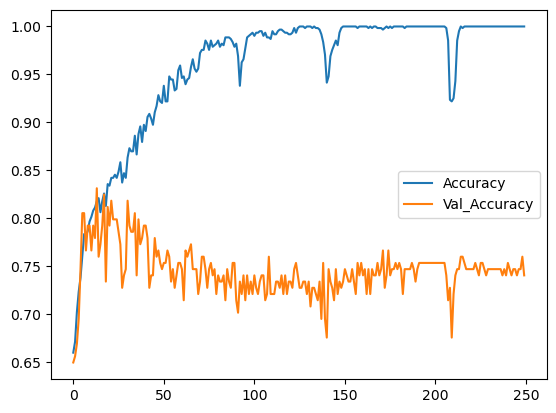

In [26]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

# DNN - Regression 

In [54]:
import pandas as pd

In [56]:
df=pd.read_pickle('kc_house.pkl') #pkl yani feature engineering yapılmış hali king house prediction için

In [58]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
x=df.drop('price', axis=1)
y=df[['price']]

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=42)

In [68]:
model=Sequential()
model.add(Dense(120,activation='relu'))   #8 sütun var diye 8 yazdık 1000 de yazardık istersek 120 yazdık sonra neuron sayısını arttırdık giderek azalan nöron ekledik başarı oran ıarttı 120 yapınca
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))   #son layer'da output için Sigmoid kullanıyoruz aynı zamanda classification olduğu için 
model.compile(loss='mse', optimizer='adam') 


In [70]:
model.fit(x_train,y_train, validation_data=(x_test, y_test),batch_size=128,epochs=300)

Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 245708980224.0000 - val_loss: 34292598784.0000
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 33199884288.0000 - val_loss: 33062803456.0000
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 32800931840.0000 - val_loss: 32388200448.0000
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 32074295296.0000 - val_loss: 31776036864.0000
Epoch 5/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 31160393728.0000 - val_loss: 31059552256.0000
Epoch 6/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 30525657088.0000 - val_loss: 30472091648.0000
Epoch 7/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 29666007040.0000 - val_loss: 29802932224.0000
Epoch 8/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 29559740416.0000 - val_loss: 29460164608.0000
Epoch 9/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 27958241280.0000 - val_loss: 29176018944.0000
Epoch 10/300
119/119 ━━━━━━━

In [72]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [73]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
r2_score(y_test,tahmin)

0.8293805355657267

In [78]:
mean_squared_error(y_test,tahmin)**.5

93456.56936714702